# Style Transfer

#### Getting VGG features

In [1]:
import Utils
import torch

from torchvision import transforms
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np

In [2]:
vgg = Utils.get_model()

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU(inplace)
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace)
  (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace)
  (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): ReLU(inplace)
  (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (14): ReLU(inplace)
  (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (16): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17)

In [5]:
vgg.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU(inplace)
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace)
  (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace)
  (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): ReLU(inplace)
  (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (14): ReLU(inplace)
  (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (16): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17)

In [6]:
content_img_path = '../content.jpg'
style_img_path = '../style.jpg'

In [7]:
content_img = Image.open(content_img_path).convert('RGB')

In [29]:
img = np.array(content_img)
a = torch.from_numpy(img)
a = Utils.load_image(content_img_path).to(device)

TypeError: Invalid dimensions for image data

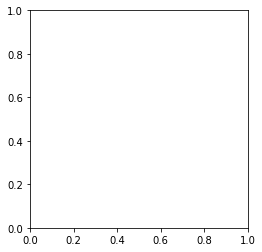

In [20]:
plt.imshow(a)
plt.title('my picture')
plt.show()

Name : 0
Layer : <class 'torch.nn.modules.conv.Conv2d'>
torch.Size([1, 64, 640, 956])


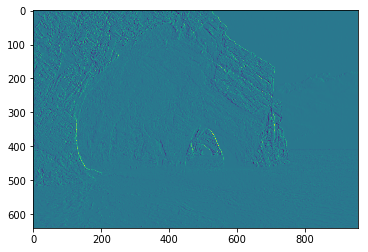

Name : 1
Layer : <class 'torch.nn.modules.activation.ReLU'>
torch.Size([1, 64, 640, 956])


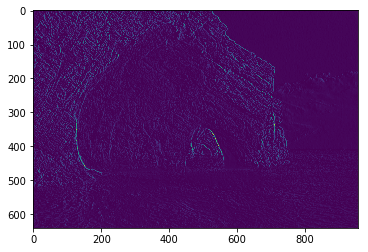

Name : 2
Layer : <class 'torch.nn.modules.pooling.MaxPool2d'>
torch.Size([1, 64, 320, 478])


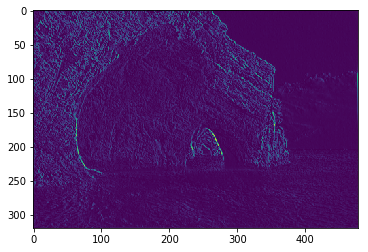

Name : 3
Layer : <class 'torch.nn.modules.conv.Conv2d'>
torch.Size([1, 128, 320, 478])


In [ ]:
for name, layer in vgg._modules.items():
    print('Name : ' + name)
    print('Layer : ' + str(type(layer)))
    a = layer(a)
    print(a.size())
    plt.imshow(a[0][0].cpu().detach().numpy())
    plt.show()

In [ ]:
vgg.parameters

In [17]:
a.to(device)

tensor([[[[-0.8164, -0.8678, -0.7650,  ..., -1.7754, -1.7925, -1.8097],
          [-0.7822, -0.9020, -0.9534,  ..., -1.7925, -1.8097, -1.8268],
          [-0.9020, -0.9705, -0.9020,  ..., -1.8097, -1.8268, -1.8439],
          ...,
          [-1.0562, -1.1075, -1.1932,  ..., -1.9809, -2.0152, -2.0323],
          [-1.2103, -1.2788, -1.4329,  ..., -2.0494, -2.0323, -2.0323],
          [-1.3815, -1.4672, -1.6555,  ..., -2.0665, -2.0323, -2.0152]],

         [[-0.6527, -0.7227, -0.6702,  ..., -0.7927, -0.8102, -0.8277],
          [-0.6001, -0.7402, -0.8452,  ..., -0.7752, -0.8102, -0.8102],
          [-0.6877, -0.7927, -0.7927,  ..., -0.7577, -0.7752, -0.7927],
          ...,
          [ 0.5553,  0.5553,  0.5378,  ..., -1.3004, -1.3354, -1.3354],
          [ 0.3978,  0.3803,  0.3452,  ..., -1.3179, -1.3004, -1.3004],
          [ 0.2927,  0.2577,  0.2227,  ..., -1.2654, -1.2304, -1.1954]],

         [[-0.3055, -0.3927, -0.3578,  ...,  0.8797,  0.8622,  0.8448],
          [-0.2358, -0.3927, -

In [16]:
device

device(type='cuda')